In [1]:
import pandas as pd
import datetime


def convert_unix(timestamp):

    date = datetime.datetime.fromtimestamp(timestamp/1000).strftime("%Y-%m-%d")
    return date


data = pd.read_csv("Bitcoin_data.csv")
data = data.drop(data.columns[0],axis = 1)
data["open_date"] = data["open_time"].apply(convert_unix)

data["close_date"] = data["close_time"].apply(convert_unix)
data.index = pd.to_datetime(data["close_date"])
data = data.drop(["open_time","close_time","open_date","close_date"],axis = 1)

data["MM_30"] = data["close"].rolling(window = 30).mean()

 np.where
 rolling.apply
 filtros
 value counts
 histogramas
 barplot
 

In [6]:
import numpy as np
import matplotlib.pyplot as plt



<AxesSubplot:ylabel='Frequency'>

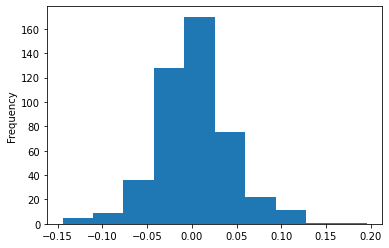

In [7]:
data["retornos"] = data["close"].pct_change()[1:]
data["retornos"].plot.hist()

In [8]:
plt.style.use("ggplot")


Text(0.5, 1.0, 'Histograma de retornos diarios del Bitcoin(2021/01 - 2022/03)')

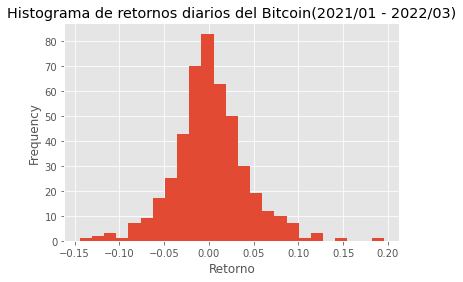

In [10]:
histograma_retornos = data["retornos"].plot.hist(bins = 25)
histograma_retornos.set_xlabel("Retorno")
histograma_retornos.set_title("Histograma de retornos diarios del Bitcoin(2021/01 - 2022/03)")


In [11]:
data["velas"] = np.where(data["close"] >= data["open"],"verde","roja")

In [14]:
data["velas"].value_counts()

verde    234
roja     225
Name: velas, dtype: int64

<AxesSubplot:title={'center':'Cantidad de velas de color (2021/01 - 2022/03)'}, ylabel='velas'>

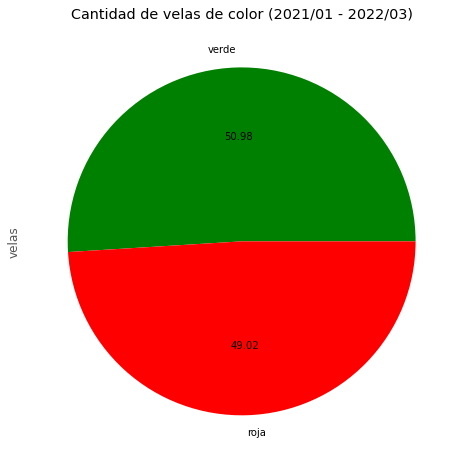

In [35]:
data["velas"].value_counts().plot.pie(
    colors = ["green","red"],title = "Cantidad de velas de color (2021/01 - 2022/03)",
    figsize = (18,8),autopct = "%.2f")

In [39]:
cierre_sobre_media = data["close"] > data["MM_30"]
velas_verdes = data["velas"] == "verde"

filtro = data[cierre_sobre_media & velas_verdes]
filtro

,open,high,low,close,volume,MM_30,retornos,velas
close_date,,,,,,,,
2021-02-02,33546.08,36041.00,33450.00,35504.06,239856.230,35053.302667,0.058367,verde
2021-02-03,35504.07,37700.00,35410.00,37652.51,240308.078,35240.684000,0.060513,verde
2021-02-05,36975.19,38411.82,36586.68,38362.65,196277.444,35391.230000,0.037475,verde
2021-02-06,38357.17,40992.40,38269.00,39249.54,310826.315,35382.917333,0.023119,verde
2021-02-08,38849.24,47146.00,38037.00,46451.32,440167.093,35533.827333,0.195681,verde
...,...,...,...,...,...,...,...,...
2022-03-27,44489.30,47047.00,44416.00,46820.80,269280.228,41091.010000,0.052408,verde
2022-03-28,46820.90,48200.00,46651.20,47121.90,317565.782,41358.430000,0.006431,verde
2022-03-29,47121.80,48100.00,46911.00,47418.50,259040.835,41683.313333,0.006294,verde


<AxesSubplot:title={'center':'Color de velas en cierres sobre la media móvil de 30 (2021/01 - 2022/03)'}, ylabel='velas'>

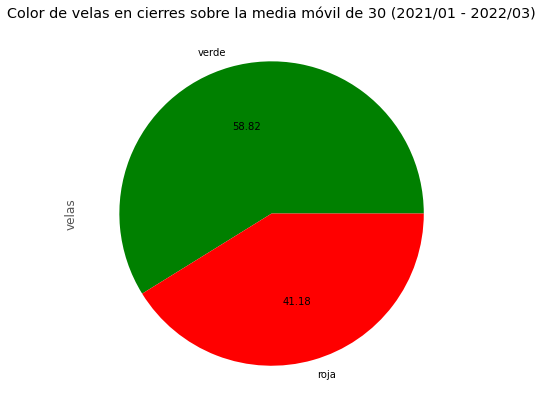

In [47]:
datos_filtrados = data[cierre_sobre_media]
datos_filtrados["velas"].value_counts().plot.pie(
    colors = ["green","red"],title = "Color de velas en cierres sobre la media móvil de 30 (2021/01 - 2022/03)",
    figsize = (10,7),autopct = "%.2f")